In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('../')

In [2]:
from SHDataset import SHDataset
from utils.utils import *
import matplotlib.lines as mlines
import os
import random

### Robustness to Noise

No noise
Noise config: 0
Noise config: 1
Noise config: 2
Noise config: 3


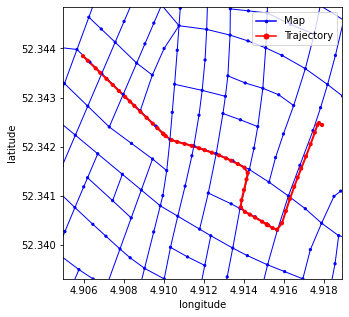

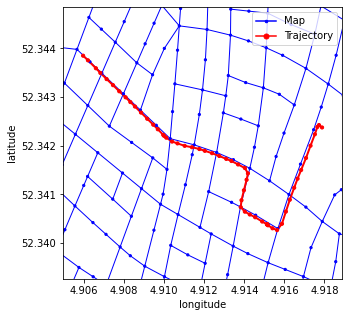

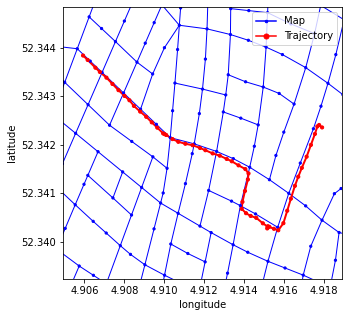

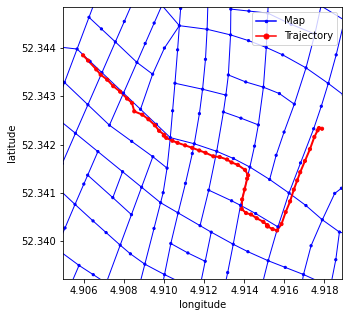

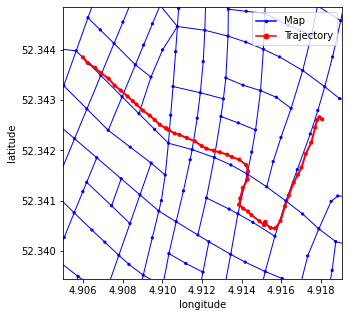

In [4]:
def plot_traj_noise(t_idx=0, figsize=(5,5), savefolder=None):
    dataset = SHDataset(noise=False)
    G1,T1,G2,T2 = dataset.read_snapshots(0)
    t = T2['T'][t_idx]
    print('No noise')
    if savefolder is None:
        plot_graph(snapshot_to_nxgraph(G1, [t]), zoom_on_traj=True, 
               show_nodes=True, T_edge_width=2.0, T_node_size=10,
                  figsize=figsize)
    else:
        if not os.path.exists(savefolder):
            os.mkdir(savefolder)
        savename = os.path.join(savefolder, 'T_ex_nonoise')
        plot_graph(snapshot_to_nxgraph(G1, [t]), zoom_on_traj=True, 
               show_nodes=True, T_edge_width=2.0, T_node_size=10,
                  figsize=figsize, show_img=False, savename=savename)
    
    for i in range(4):
        print(f'Noise config: {i}')
        dataset = SHDataset(noise=True, noise_config=i)
        G1,T1,G2,T2 = dataset.read_snapshots(0)
        t = T2['T'][t_idx]
        if savefolder is None:
            plot_graph(snapshot_to_nxgraph(G1, [t]), zoom_on_traj=True, 
                       show_nodes=True, T_edge_width=2.0, T_node_size=10,
                      figsize=figsize)
        else:
            savename = os.path.join(savefolder, f'T_ex_noiseconf{i}')
            plot_graph(snapshot_to_nxgraph(G1, [t]), zoom_on_traj=True, 
                       show_nodes=True, T_edge_width=2.0, T_node_size=10,
                      figsize=figsize, show_img=False, savename=savename)

plot_traj_noise(0, savefolder='figures')

### Robustness to Trajectory Sparsity

# of trajectories: 2000
# of trajectories: 4000
# of trajectories: 6000
# of trajectories: 8000
# of trajectories: 10000


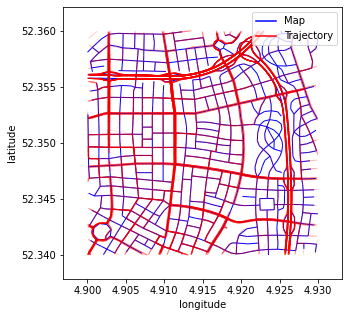

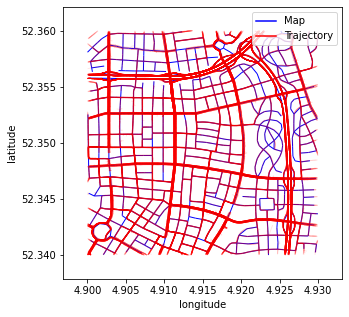

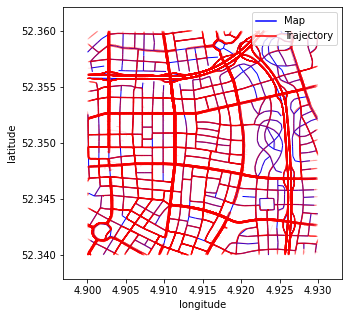

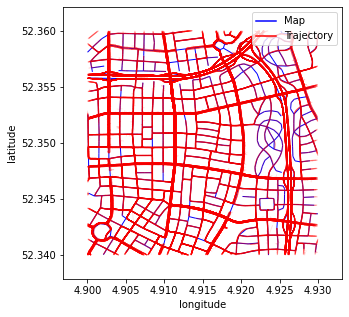

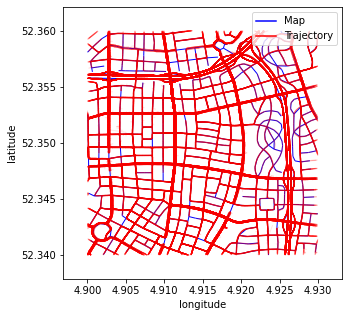

In [5]:

def plot_traj_sparsity(steps=5, total_t2=None, figsize=(5,5), savefolder=None):
    if savefolder is not None and not os.path.exists(savefolder):
        os.mkdir(savefolder)
        
    
    dataset = SHDataset(noise=False)
    G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=(52.34,52.36, 4.90, 4.93))
    
    if total_t2 is None:
        total_t2 = len(T2['T'])
    
    n_traj_steps = np.linspace(0, total_t2, steps+1, dtype=np.int64)[1:]
    
    for n_traj in n_traj_steps:
        print(f'# of trajectories: {n_traj}')
        T2_ = random.sample(T2['T'], n_traj)
        if savefolder is None:
            plot_graph(snapshot_to_nxgraph(G1, T2_), figsize=figsize, traj_alpha=0.1)
        else:
            savename = os.path.join(savefolder, f'T_ex_tspars_{n_traj}ts')
            plot_graph(snapshot_to_nxgraph(G1, T2_), figsize=figsize, traj_alpha=0.1,
                      show_img=False, savename=savename)

plot_traj_sparsity(total_t2=10000, savefolder='figures')

### Robustness to Temporal Sparsity

Resampling every 1 points
Resampling every 2 points
Resampling every 3 points
Resampling every 4 points
Resampling every 5 points


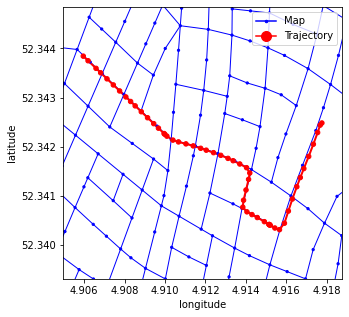

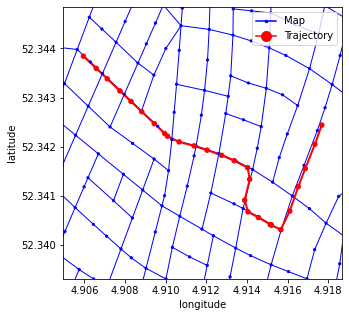

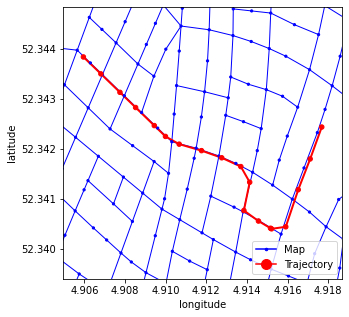

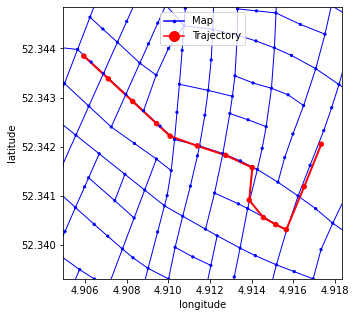

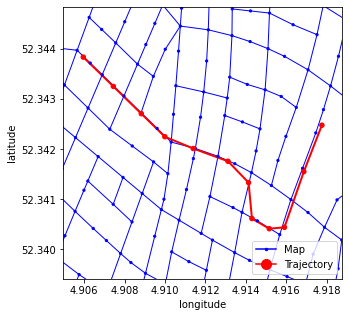

In [6]:
def plot_temp_sparsity(t_idx=0, steps=5, figsize=(5,5), savefolder=None):
    if savefolder is not None and not os.path.exists(savefolder):
        os.mkdir(savefolder)
        
    dataset = SHDataset(noise=False)
    G1,T1,G2,T2 = dataset.read_snapshots(0)
    t = T2['T'][t_idx]
    
    resample_traj_steps = np.arange(1,steps+1)
    
    for resample_everyn in resample_traj_steps:
        print(f'Resampling every {resample_everyn} points')
        t_ = t[0:-1:resample_everyn]
        if savefolder is None:
            plot_graph(snapshot_to_nxgraph(G1, [t_]), zoom_on_traj=True, 
                       show_nodes=True, T_node_size=20, G_node_size=5, T_edge_width=2.0,
                      figsize=figsize)
        else:
            savename = os.path.join(savefolder, f'T_ex_resample_every{resample_everyn}')
            plot_graph(snapshot_to_nxgraph(G1, [t_]), zoom_on_traj=True, 
                       show_nodes=True, T_node_size=20, G_node_size=5, T_edge_width=2.0,
                      figsize=figsize, show_img=False, savename=savename)
    
plot_temp_sparsity(t_idx=0, savefolder='figures')

### Plotting Maps w/ Removed Roads

In [26]:
def plot_removedroads_example(map_idx=0, bbox=None, savename=None):
    dataset = SHDataset(noise=False)
    G1,T1,G2,T2 = dataset.read_snapshots(map_idx, bbox=bbox)
    G12_diff = compare_snapshots(G1,G2)[1]
    edge_colors = nx.get_edge_attributes(G12_diff, name='color')
    n_removed = len([edge for edge, col in edge_colors.items() if col == 'magenta'])
    n_edges = len(list(edge_colors.values()))
    map_name = dataset.maps[map_idx]['map_name']
    title = f'{map_name}: {n_removed}/{n_edges} Roads Removed'
    plot_graph(G12_diff, figsize=(8,8), removed_road_edge_width=3, title=title, savename=savename, show_img=False)

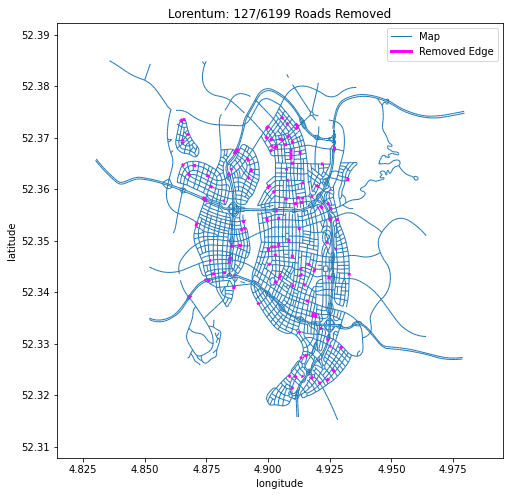

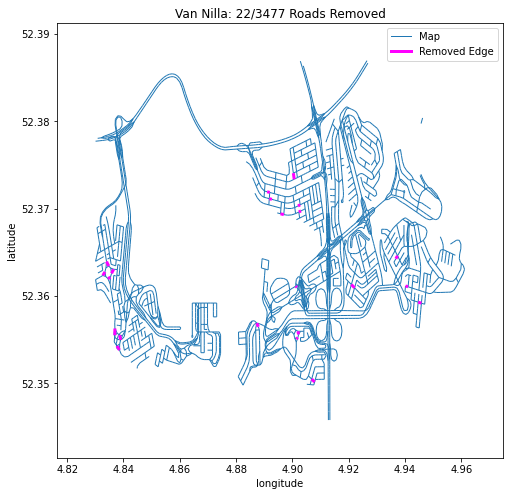

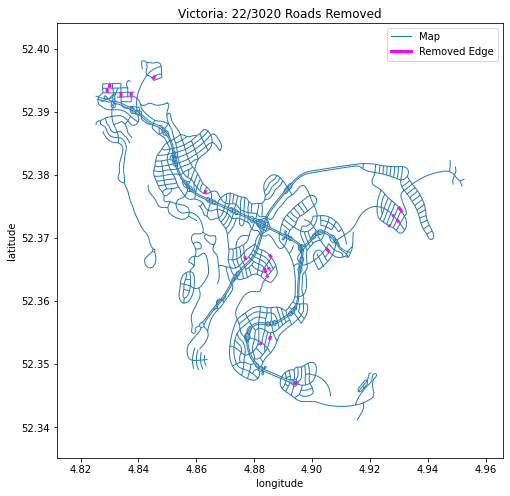

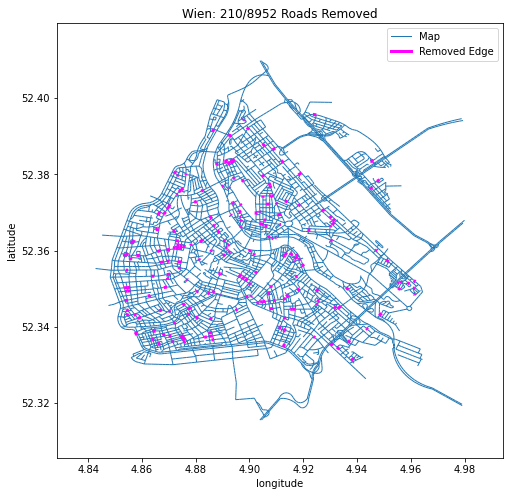

In [27]:
bboxs = [
    (52.315, 52.385, 4.83, 4.98),
    (52.345, 52.387, 4.83, 4.98),
    (52.315, 52.4, 4.825, 4.98),
    (52.315, 52.41, 4.83, 4.98)
]

for i in range(4):
    plot_removedroads_example(map_idx=i, bbox=bboxs[i], savename=os.path.join('./figures', f'map{i}_example'))